In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline
%run ProcessData.ipynb
%run PlottingMethods.ipynb


#to save images : plt.savefig('foo.png', format='png', dpi=600)

iii


# Running code

##      <span style="color:orange">A.  LSA</span>

###      <span style="color:green"><u>Traveling Salesman Problem</u></span>

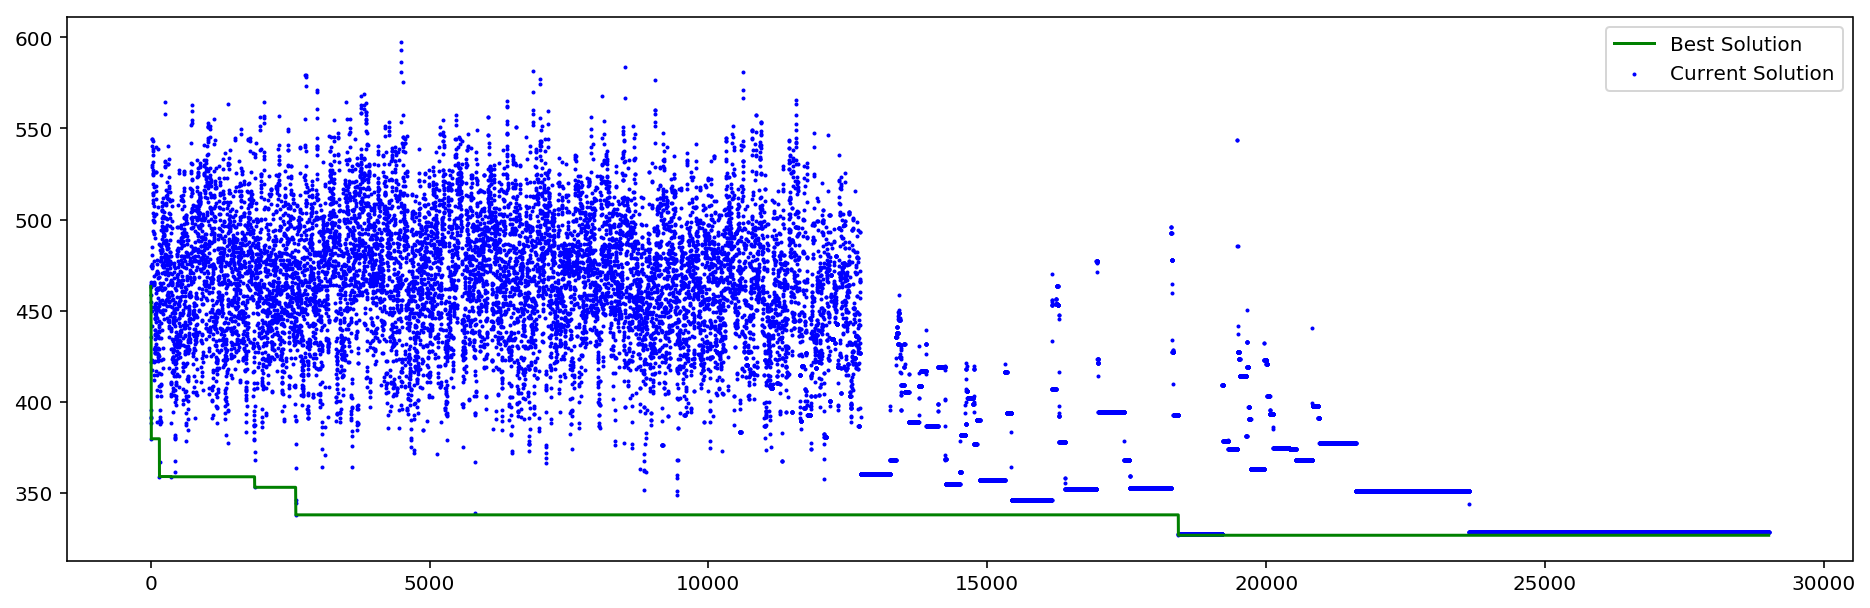

In [15]:
path = "../java/SimulatedAnnealing/GraphData/LSA_TSP.txt"
acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA2(best_y, curr_y)#, temp, acceptance_pb, acc_best_sol, 10000)


----
###      <span style="color:green"><u>Min Function</u></span>

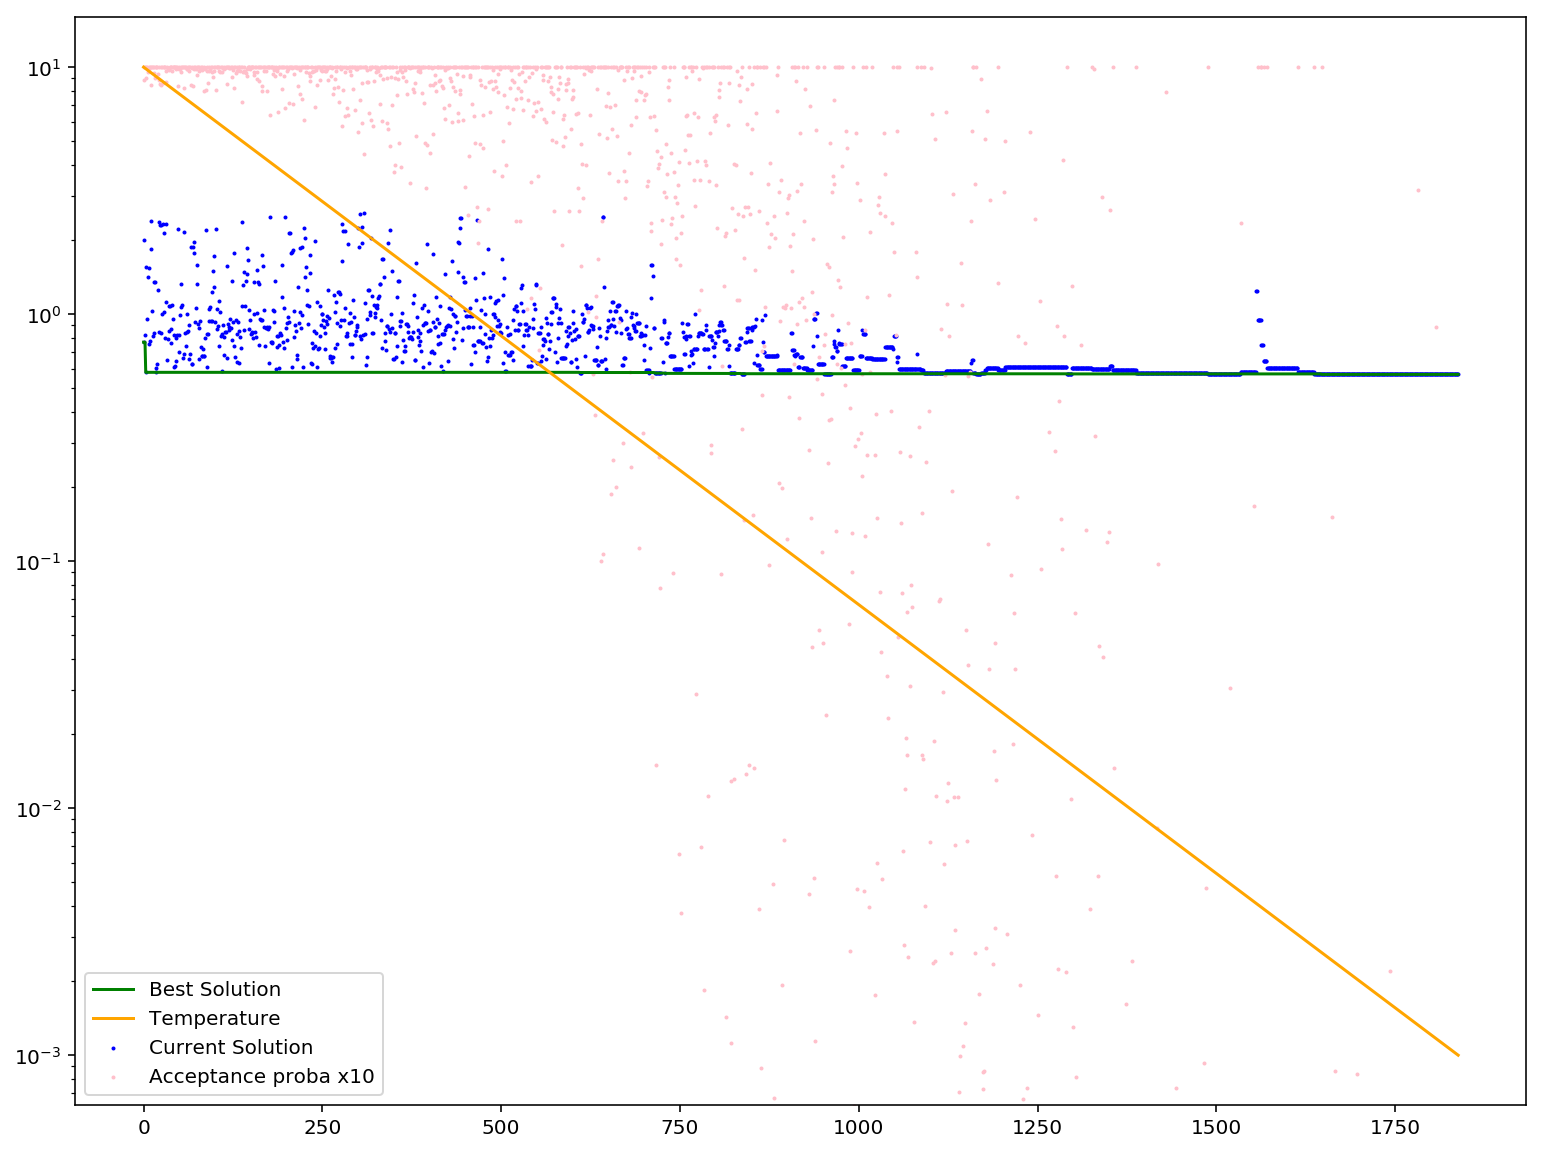

In [16]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction.txt"
acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10)


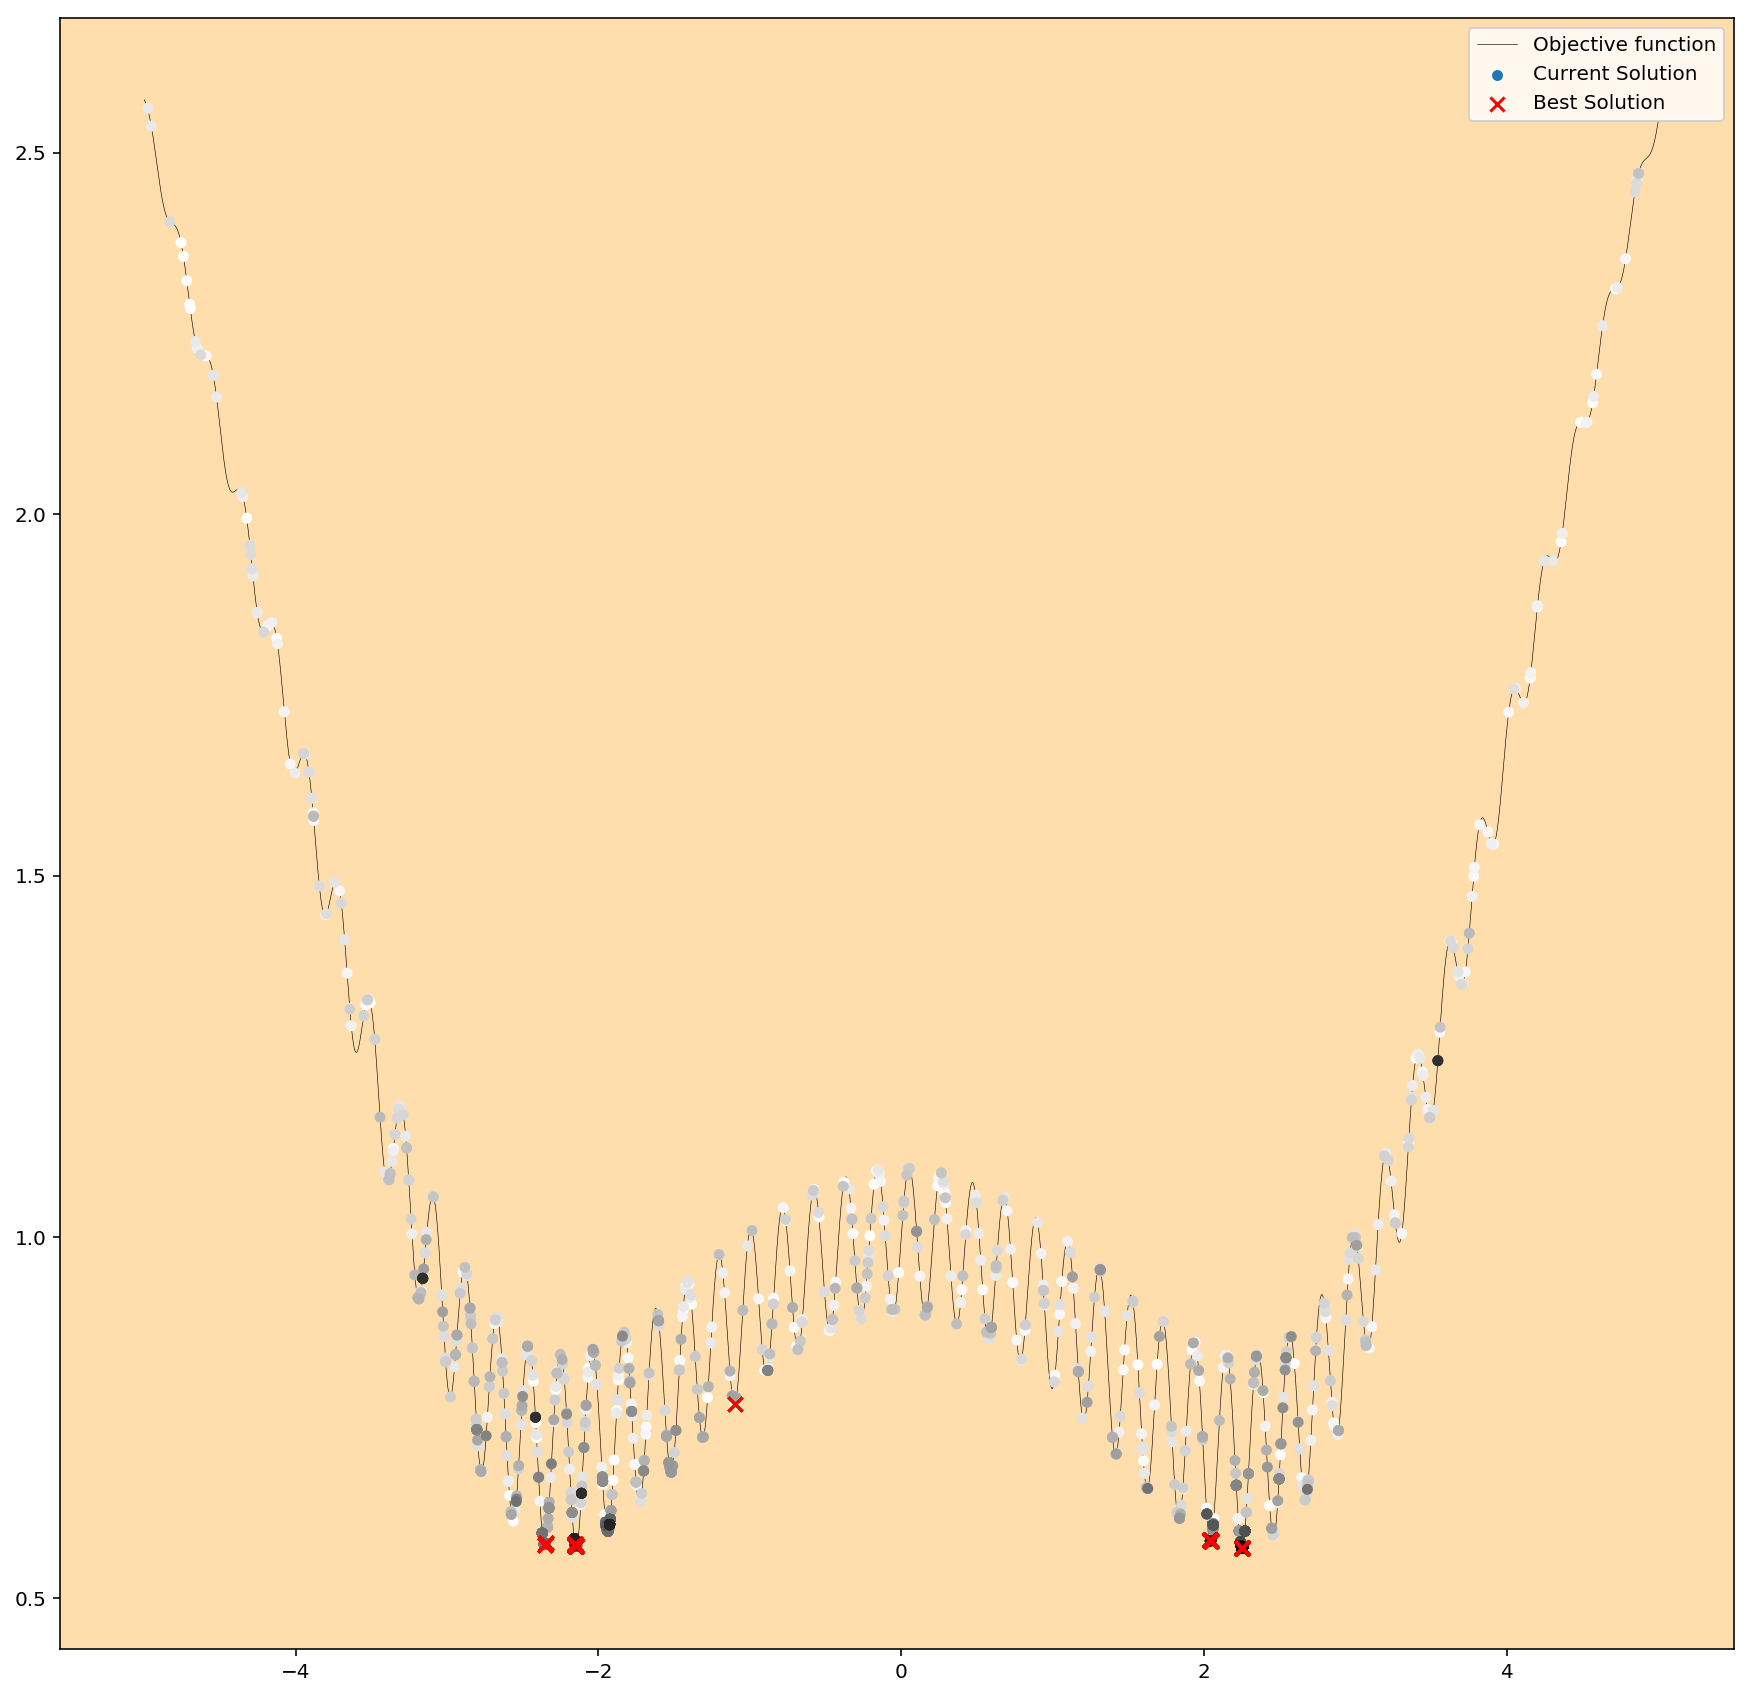

In [19]:
curr_x = curr_xs[0]
best_x = best_xs[0]
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

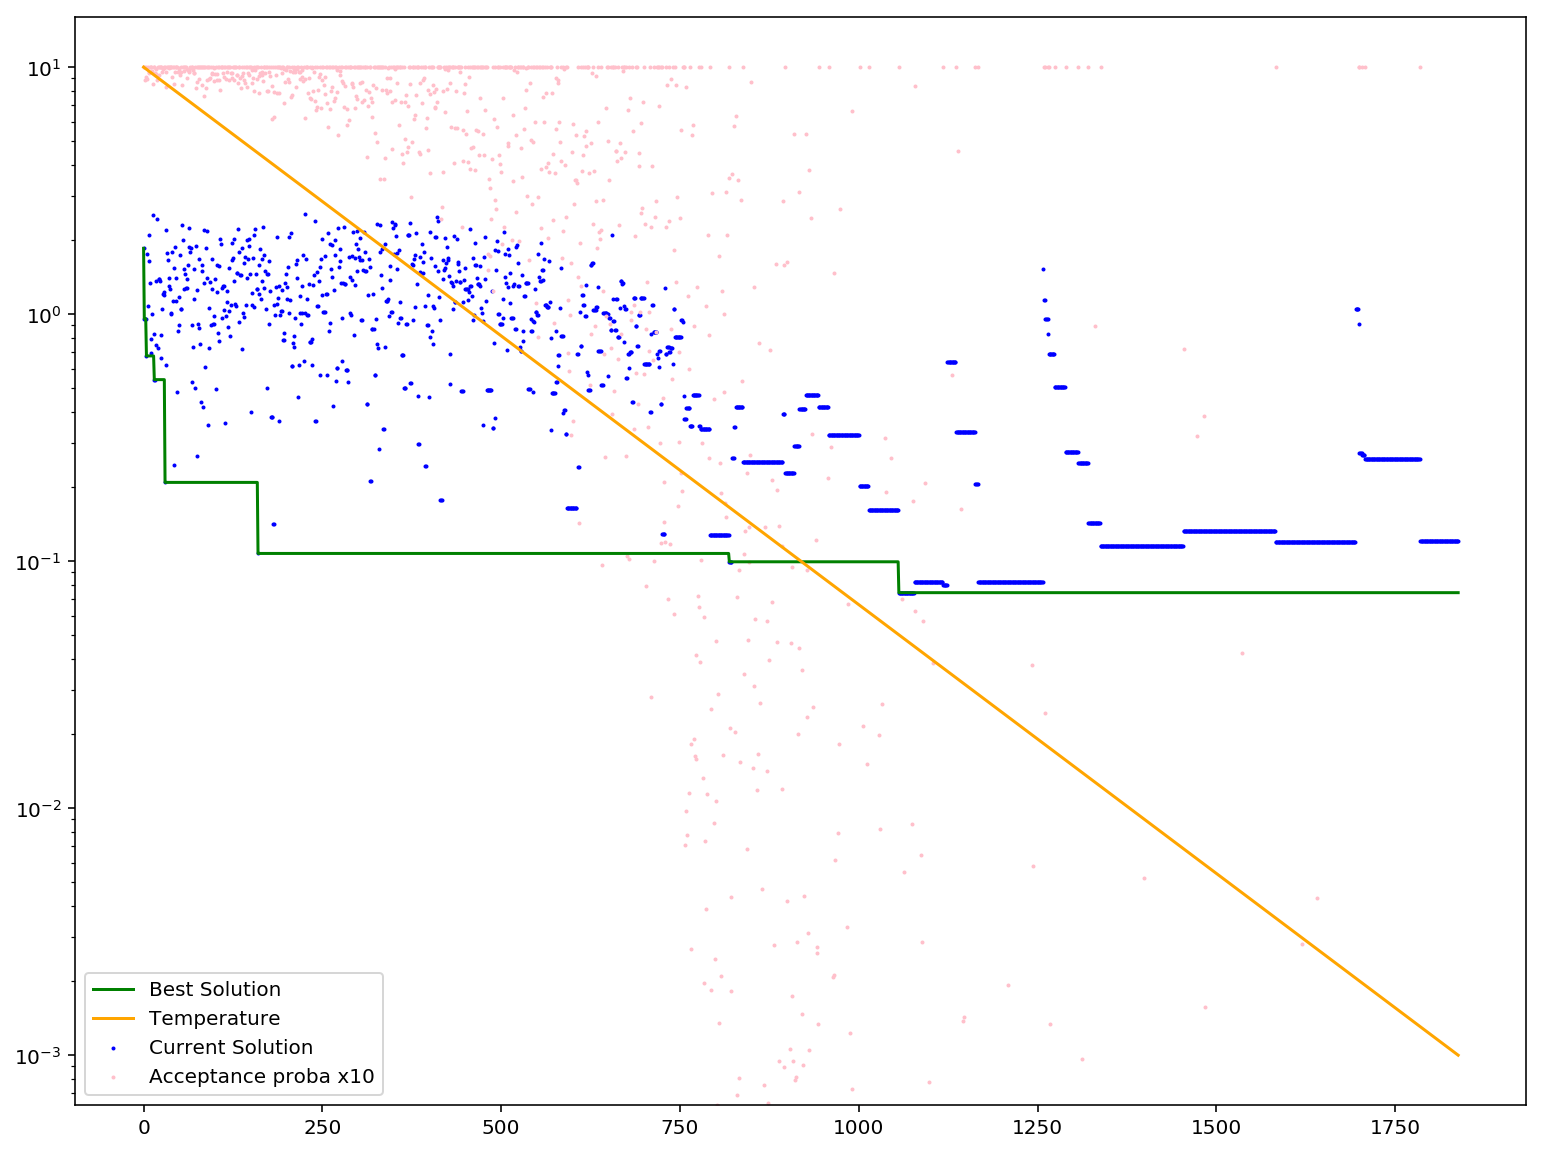

In [5]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction3D.txt"
acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10)


----

##      <span style="color:orange">B.  DSA</span>

###      <span style="color:green"><u>Min Function</u></span>

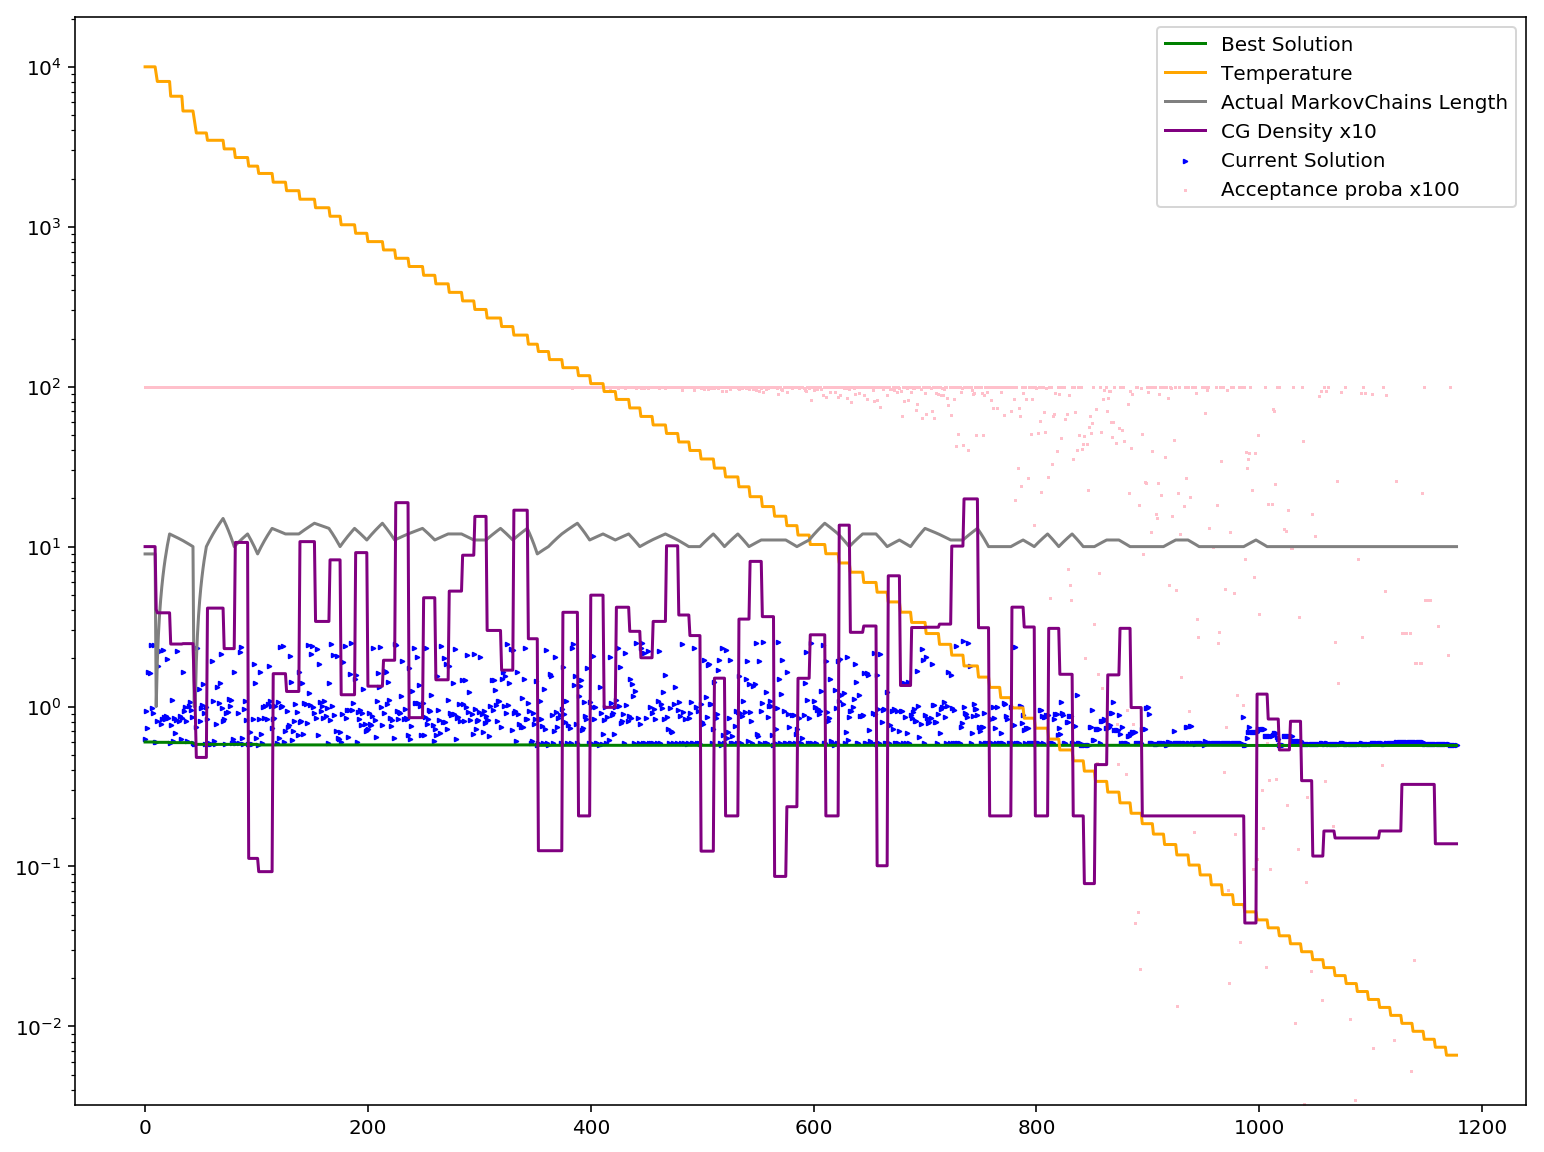

In [6]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

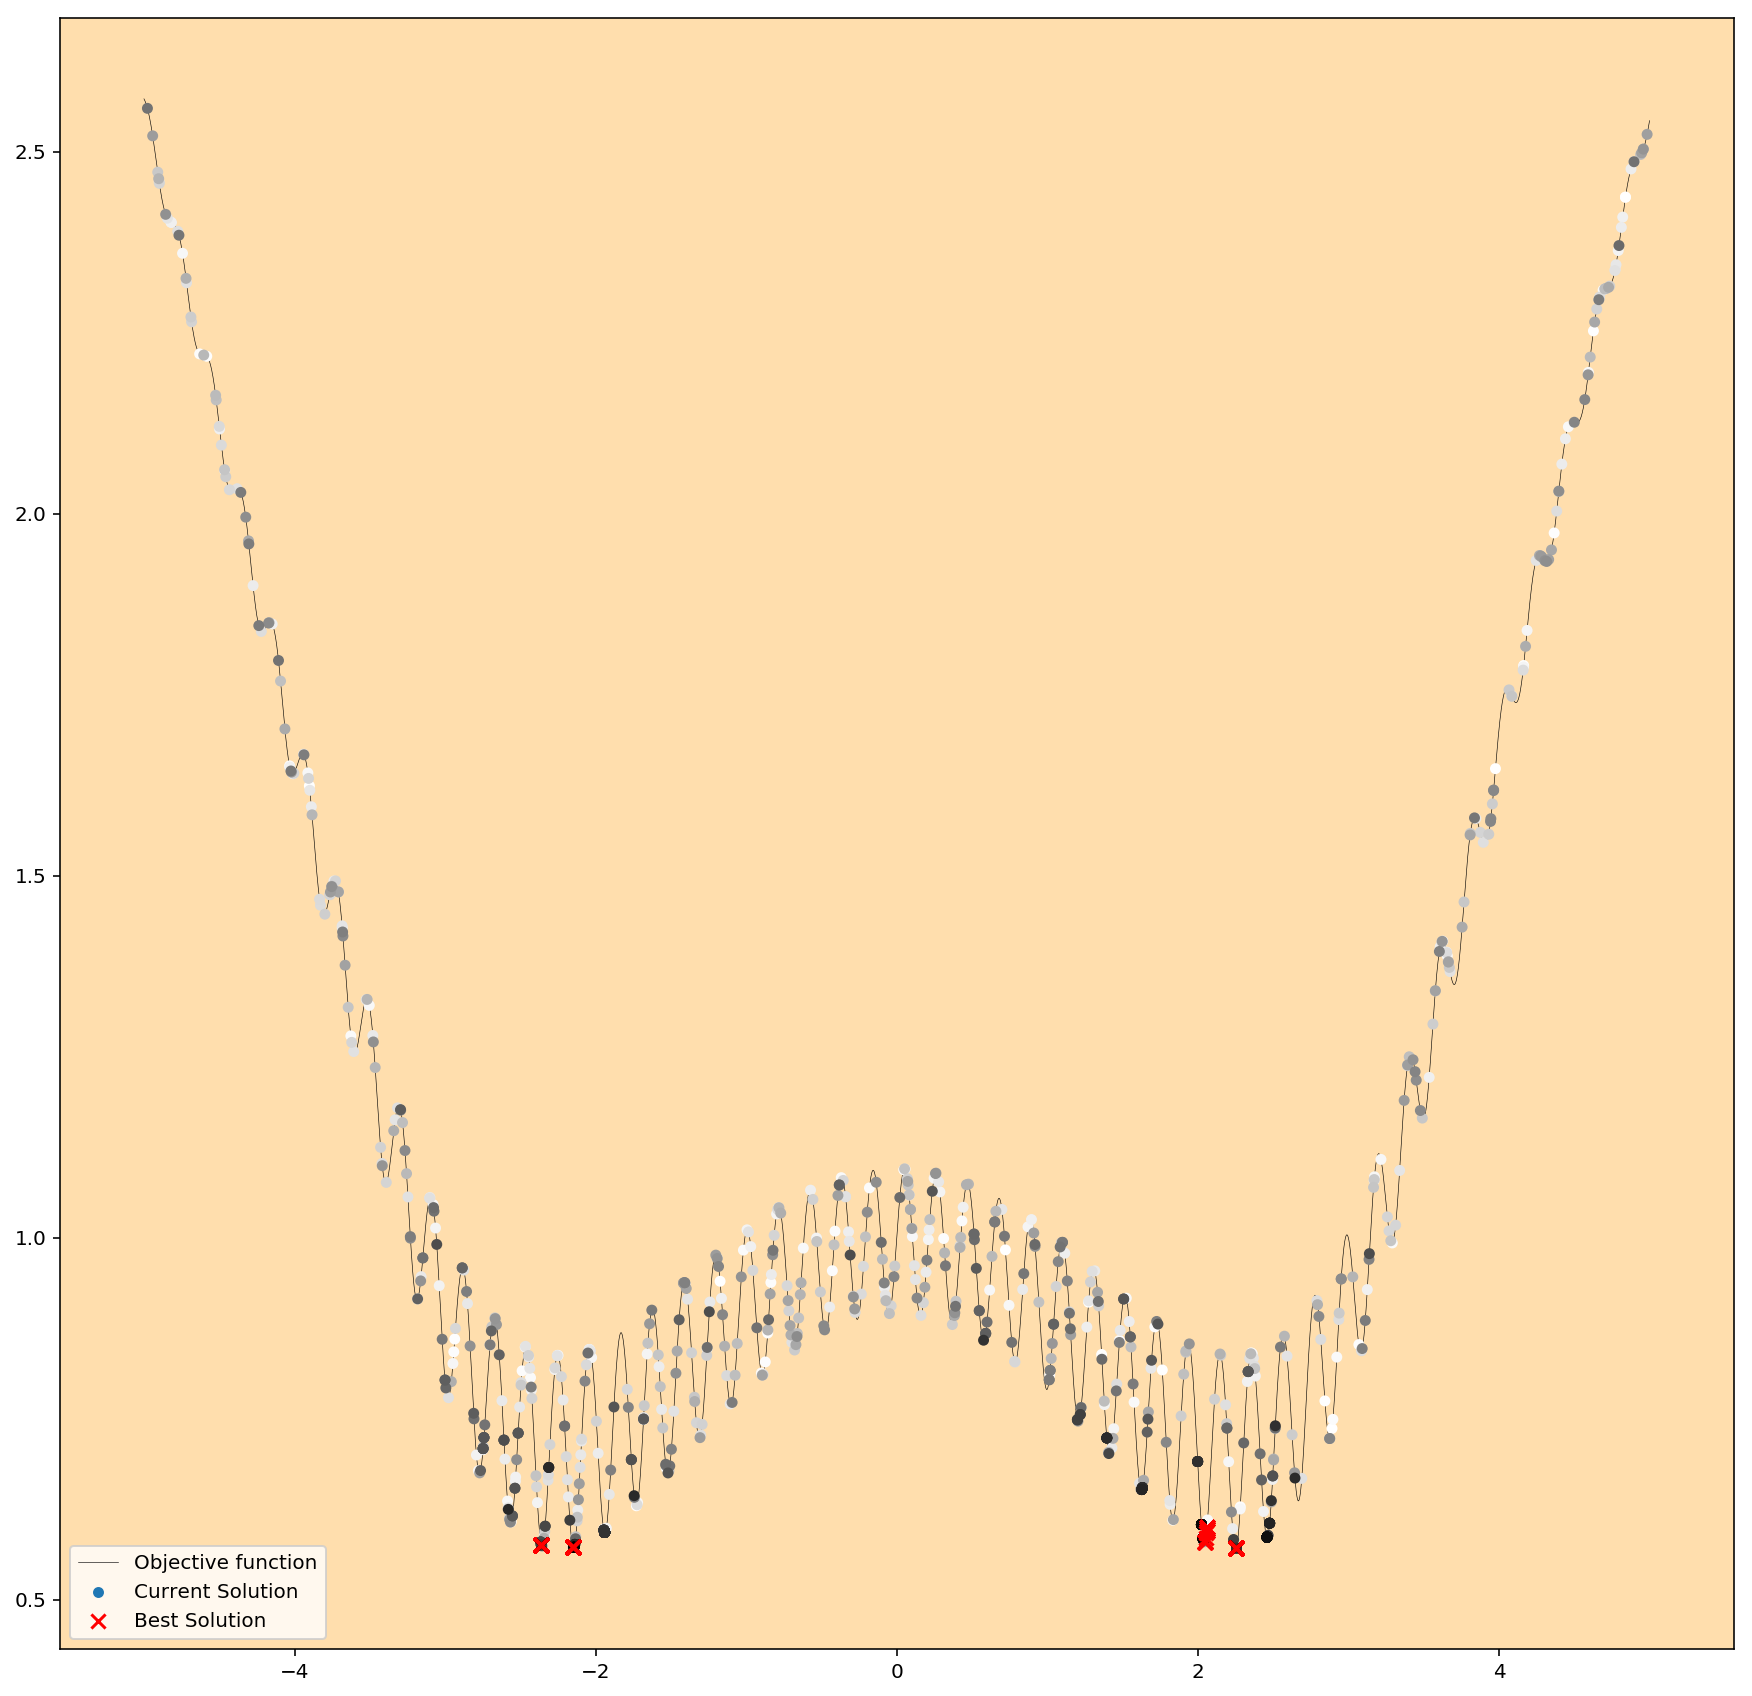

<Figure size 432x288 with 0 Axes>

In [7]:
curr_x = curr_xs[0]
best_x = best_xs[0]
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

###      <span style="color:green"><u>Min Function 3D</u></span>

In [ ]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)


In [ ]:
curr_x = curr_xs[0]
best_x = best_xs[0]
curr_x2 = curr_xs[1]
best_x2 = best_xs[1]

drawSolutionDSAMF3D(curr_x2, best_x2, curr_x, best_x)

#      <span style="color:green"><u>Min Function 4D</u></span>

In [ ]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)



# Univariate Analysis

## Visualizing one dimension

In [ ]:
data, data_cur, data_best, data_curCG = processData4D_panda('../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D.txt')
data_curCG.head()

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

data.hist(bins=40, color='steelblue', edgecolor='black', linewidth=0.5,
              xlabelsize=8, ylabelsize=8, grid=False, layout=(2,4), range=[-5,5])


plt.tight_layout(rect=(0, 0.5, 2, 2))   


Mettre où est la best solution finale !!!

# Multivariate Analysis

## Visualizing two dimensions

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
corr = data_curCG.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax1, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

corr = data_best.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax2, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
ax1.set_title('Current Axis (from Controlled Generation)')
ax2.set_title('Best Axis')

t= f.suptitle('Correlation Heatmap                                         ', fontsize=14)

La corrélattion est vraiment biaisée car tous les points sont regroupés en un point à chaque fois, et les quelques points hors minima global qui sont atteints changent drastiquement la corrélation. La représentation visuelle des corrélations est représentée juste en dessous. D'ailleurs cette corrélation change à chaque fois qu'on rerun l'algo, même si il trouve le résultat à chaque fois !

A noter que dans le graph de gauche, on a bien CURR en f° des CURR et non pas des BEST, faute de label d'axe

In [ ]:
pp = sns.pairplot(data_best, height=1.6, aspect=1.8,markers="+",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

f.subplots_adjust(top=1, wspace=0.3)
t = f.suptitle('Best Axis Pairwise Plots', fontsize=14)

In [ ]:
pp = sns.pairplot(data_cur, height=1.8, aspect=1.8,markers="+",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

f.subplots_adjust(top=1, wspace=0.3)
t = f.suptitle('Current Axis Pairwise Plots', fontsize=14)


#### Est-ce qu'il faudrait pas plutôt que plot les valeurs ne venant que du Controlled Generation ? 

In [ ]:
pp = sns.pairplot(data_curCG, height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5, 'alpha':0.1, 'edgecolor': 'w', 'color':'darkred'},
                  diag_kind="hist", diag_kws={'bins':50, 'color':'black', 'edgecolor': 'w'})

### Two Continuous Numeric attributes 

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 6))

ax1.scatter(data_curCG['CURR x'], data_curCG['CURR x2'], alpha=0.4, edgecolors='w')
ax1.set_title('X = CURR x (from CG)        Y = CURR x2 (from CG)',y=1.05)

ax2.scatter(data_curCG['CURR x'], data_curCG['CURR x3'], alpha=0.4, edgecolors='w', c = 'darkred')
ax2.set_title('X = CURR x (from CG)        Y = CURR x3 (from CG)',y=1.05)

ax3.scatter(data_curCG['CURR x2'], data_curCG['CURR x3'], alpha=0.4, edgecolors='w', c= 'darkgreen')
ax3.set_title('X = CURR x2 (from CG)        Y = CURR x3 (from CG)',y=1.05)


In [ ]:
JP1 = sns.jointplot(x='CURR x', y='CURR x2', data=data_curCG, kind='scatter', space=0, height=5, ratio=4,
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50, 'color':'darkblue'})
JP2 = sns.jointplot(x='CURR x', y='CURR x3', data=data_curCG, kind='scatter', space=0, height=5, ratio=4, color = 'darkred',
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50})
JP3 = sns.jointplot(x='CURR x2', y='CURR x3', data=data_curCG, kind='scatter', space=0, height=5, ratio=4, color = 'darkgreen',
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50})

Lancer l'algo 500 fois et comparé les résultats finaux à chaque (avec un bruit à chaque fois)

Parralel coordinates a faire avec les 500 fois lancé avec dégradé en fonction de la best solution



In [ ]:
data_mult = processData_stocha('../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D_Stocha.txt')
data_mult = data_mult.sort_values(by=['BEST y'])[::-1]
data_mult.head()

### Statistics on all the 500 runs

In [ ]:
rs = data_mult.describe()
rs

Le maximum Global est atteint en :

In [ ]:
isGlobalBest = data_mult['BEST y']==data_mult['BEST y'].min()
data_mult[isGlobalBest]

In [ ]:
# redefinition of parallel_coordinates function in order to plot the color bar

def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()
    ax.set_facecolor('navajowhite')


    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.5f')

    return fig

In [ ]:
plt.close()
plt.gcf().clear()    

parallel_coordinates(data_mult, 'BEST y', ax=ax, colormap = 'Greys')
plt.ylabel("BEST y values")

#plt.figure(figsize=(20,10))